# Tokens and coins analysis

This is an analysis of tokens and coins popularity, based on the holding data across 13 digital asset arrays (DAAs -- think of them as managed funds) on [Iconomi](https://www.iconomi.net/). For each DAA, their holdings and weights are provided on the Iconomi website.

# Read ICONOMI data

Data was manually collected for this quick experiment. It's possible to implement a crawler for this purpose, though it will have to deal with Javascript to extract content as rendered in a browser.

In [2]:
import pandas as pd
import os
from plotnine import *

/Users/trung/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
cd /Users/trung/PycharmProjects/crypto/

/Users/trung/PycharmProjects/crypto


In [8]:
def read_iconomi_data(data_dir):
    '''
    Reads ICONOMI digital asset arrays.
    '''
    result = pd.DataFrame()
    for filename in os.listdir(data_dir):
        daa = pd.read_csv(os.path.join(data_dir, filename), delimiter='\t')
        result = result.append(daa)
    
    return result

In [9]:
DATA_DIR='data/iconomi'
df = read_iconomi_data(DATA_DIR)

In [10]:
df.head()

,Holding,Category,RebalancingWeight,CurrentWeight
0,Bitcoin (BTC),Value,15.00 %,14.65 %
1,Ethereum (ETH),Platform,14.15 %,13.97 %
2,Dash (DASH),Anonymity,12.60 %,12.53 %
3,Monero (XMR),Anonymity,12.34 %,12.41 %
4,Lisk (LSK),Platform,10.22 %,10.45 %


In [11]:
df.shape

(196, 4)

## Which coins / tokens are most popular?



In [12]:
n_funds = len(os.listdir(DATA_DIR))
print('Number of DAAs (funds): {}'.format(n_funds))

Number of DAAs (funds): 13


## Equal weighting

By equal weighting I mean popularity is determined by the number of times an asset is chosen by funds. In other words, this is popularity by counts.

In [13]:
df.Holding.value_counts()

Bitcoin (BTC)                     13
Ethereum (ETH)                    12
Waves (WAVES)                     10
Aragon (ANT)                       9
Civic (CVC)                        9
TenX (PAY)                         7
Status (SNT)                       7
OmiseGO (OMG)                      7
Basic Attention Token (BAT)        7
WeTrust (TRST)                     6
Dash (DASH)                        6
Steem (STEEM)                      6
MaidSafeCoin (MAID)                6
Bancor (BNT)                       5
Golem (GNT)                        5
GameCredits (GAME)                 5
Augur (REP)                        5
SingularDTV (SNGLS)                5
DigixDAO (DGD)                     5
iExec (RLC)                        5
WINGS (WINGS)                      4
0x (ZRX)                           4
FunFair (FUN)                      4
Cofound.it (CFI)                   4
Melon (MLN)                        4
Lisk (LSK)                         4
Monero (XMR)                       3
M

There's no surprise at the top as Bitcoin are selected by all funds and Ethereum by all but one. The next seven are however quite intriguing. They are all held by more than half of the funds, yet none of them are in the top 10 by market caps. Tokens like Civic, Status, and Aragon are even outside of the top 50, perhaps suggesting that some managers are focused on their long-term potential.

OmiseGo used to be in the top 10 but has been hammered by the recent and upcoming Bitcoin hardforks, like all other altcoins.

Holding | Market Cap (millions) | Rank by market cap (as of 5th Nov, 2017)
--|--|--
Bitcoin | \$124,112 | 1
Ethereum | \$28,639 | 2
Waves | \$359 | 21 
Aragon | \$41 | 100
Civic | \$101 | 59 
TenX | \$173 | 31
Status | \$111 | 53
OmiseGo | \$632 | 13
Basic Attention Token | \$142 | 40


In [14]:
holding_counts = df.Holding.value_counts()

In [15]:
holding_counts = holding_counts[holding_counts > 6].sort_values(ascending=False)

In [16]:
d = pd.DataFrame({'Holding': holding_counts.index, 'Count': holding_counts.values})

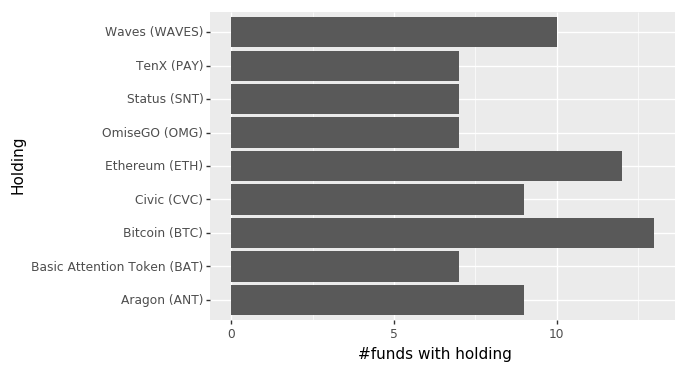

<ggplot: (286263929)>

In [24]:
ggplot(d, aes(x = 'Holding', y='Count')) + geom_bar(stat='identity') + coord_flip() + labs(y = '#funds with holding')

## Weighted by proportions

Here we compute the popularity based on the proportion of an asset within a fund. 

In [87]:
df['weight'] = df['CurrentWeight'].str.split(' ').str[0].astype(float)

In [91]:
holding_groups = df.groupby('Holding')

In [100]:
holding_weights = holding_groups['weight'].agg(sum) / n_funds

In [102]:
holding_weights.sort_values(ascending=False)

Holding
Bitcoin (BTC)                     27.456923
Ethereum (ETH)                    16.146923
Waves (WAVES)                      5.584615
Dash (DASH)                        4.159231
Civic (CVC)                        3.923846
TenX (PAY)                         3.803846
Aragon (ANT)                       3.032308
OmiseGO (OMG)                      2.570769
Status (SNT)                       2.307692
0x (ZRX)                           2.273077
Monero (XMR)                       2.100769
Steem (STEEM)                      1.782308
MaidSafeCoin (MAID)                1.763846
Basic Attention Token (BAT)        1.561538
WINGS (WINGS)                      1.531538
Lisk (LSK)                         1.495385
Melon (MLN)                        1.460769
Augur (REP)                        1.406154
WeTrust (TRST)                     1.397692
FunFair (FUN)                      1.318462
GameCredits (GAME)                 1.225385
Bancor (BNT)                       1.206154
Golem (GNT)             

This mostly agrees with the ranking by counts, with a slight change in the order due to the weighting by proportion in a fund.

## Which categories are most popular?

We know that each coin / token typically belongs to a category with related applications. So which application categories are most popular among the funds?

In [108]:
df['Category'].value_counts()

Platform                                        24
Value                                           13
Programmable Platform                           10
Decentralized Computing                         10
Storage                                          9
Anonymity                                        9
Enterprise Management                            9
Identity Management                              9
Debit Card                                       8
Advertisement                                    7
Smartphone Ethereum Gateway                      7
Decentralized Exchange and Payments Platform     7
Lending                                          6
Media                                            6
Prediction                                       5
Gaming                                           5
Media / TV                                       5
Financial Derivative                             5
Value Gold                                       5
Decentralized Exchange Protocol